In [1]:
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt
%matplotlib inline
import os

In [3]:
img_fits = 'sample.fits'
cat_fits = 'sample.cat.fits'

In [4]:
cmd = 'sex {} -CATALOG_NAME {}'.format(img_fits, cat_fits)

In [5]:
cmd

'sex sample.fits -CATALOG_NAME sample.cat.fits'

In [7]:
os.system(cmd)

0

In [8]:
img = fits.getdata(img_fits)
cat = fits.getdata(cat_fits, 2)

In [9]:
img_med = np.median(img)
img_std = np.std(img)

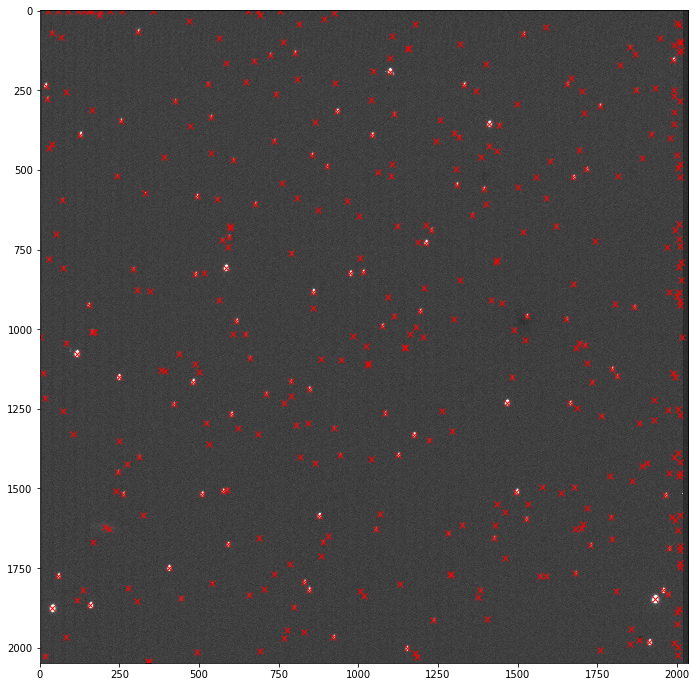

In [21]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.imshow(img, 
          vmax=img_med + 1.5 * img_std, 
          vmin=img_med - 0.5 * img_std, 
          cmap='gray')
ax.plot(cat['X_IMAGE']-1, cat['Y_IMAGE'] -1, 'rx')
fig.savefig(img_fits + '.eps')
fig.savefig(img_fits + '.png')

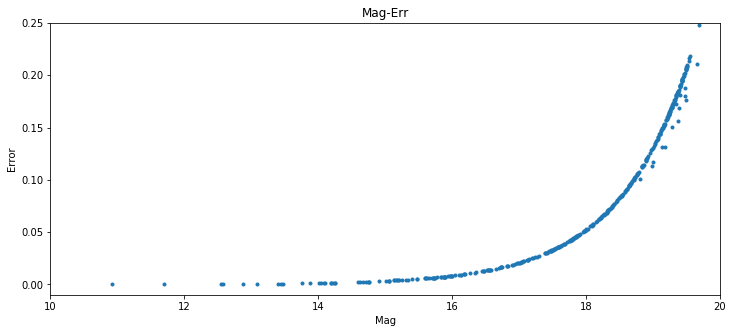

In [22]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax.plot(cat['MAG_APER'] + 25.0, cat['MAGERR_APER'], '.')
ax.set_xlabel('Mag')
ax.set_ylabel('Error')
ax.set_xlim(10, 20)
ax.set_ylim(-0.01, 0.25)
ax.set_title('Mag-Err')
fig.savefig(img_fits + '.magerr.eps')
fig.savefig(img_fits + '.magerr.png')

In [17]:
cat[100]['MAG_APER'] = 99.9
cat[100]['MAGERR_APER'] = 99.9

In [16]:
cat[100]

(101, 30.343277, 431.39548, 328.8456668772753, 23.711245448400017, -6.0447555, 0.12623098, 0, 7.297587, 1.6836631, 1083.7362)

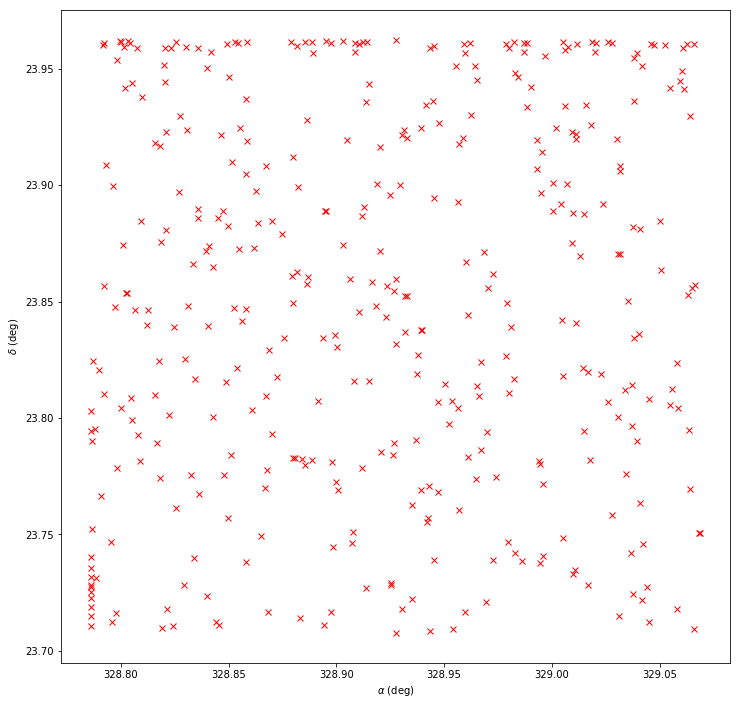

In [25]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.plot(cat['ALPHA_J2000'], cat['DELTA_J2000'], 'rx')
ax.set_xlabel("$\\alpha$ (deg)")
ax.set_ylabel("$\\delta$ (deg)")
fig.savefig(img_fits + '.sky.eps')
fig.savefig(img_fits + '.sky.png')